## МГТУ им. Н. Э. Баумана
## Факультет: Информатика, искусственный интеллект и системы управления
## Кафедра: Системы обработки информации и управления
## Дисциплина: Методы машинного обучения
## Лабораторная работа №1 "Создание "истории о данных" (Data Storytelling)"
## Выполнил: Богданов Д. А. ИУ5-24М

Задание:

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
 - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
 - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
 - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
 - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
 - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('ML_ALL_benchmarks.csv')
data.head()

,device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656


In [ ]:
data.dtypes

device      object
company     object
cpuName     object
cores        int64
clock        int64
cpuScore     int64
gpuScore     int64
npuScore     int64
dtype: object

Рассмотрим распределение рейтинга производительности CPU

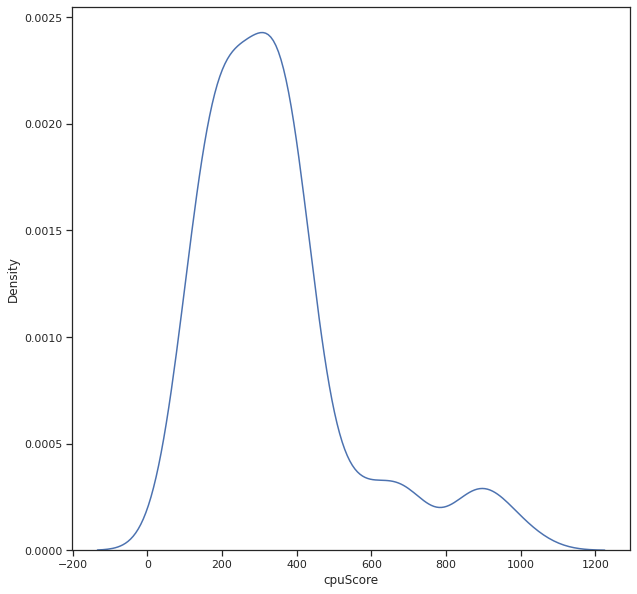

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data=data, x="cpuScore")

Рассмотрим кол-во ядер в телефонах

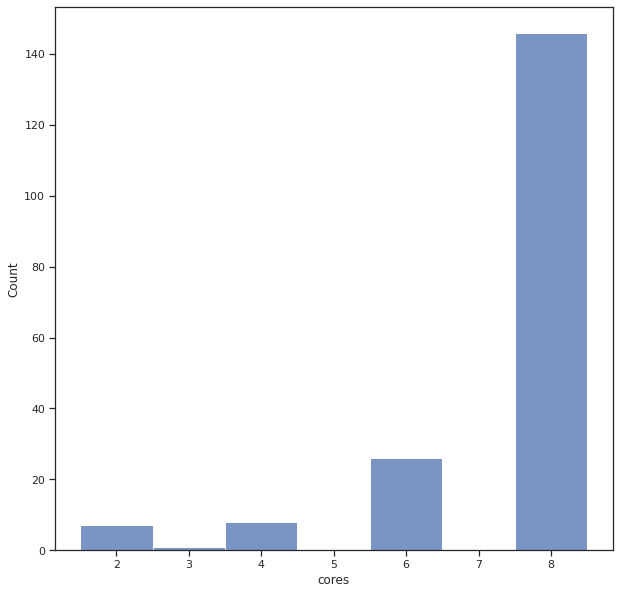

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.histplot(data['cores'], discrete=True)

Можно сделать вывод, что в наше время наиболее популярны телефоны с 8 ядрами

Рассмотрим зависимость количества голов от лиги на графике

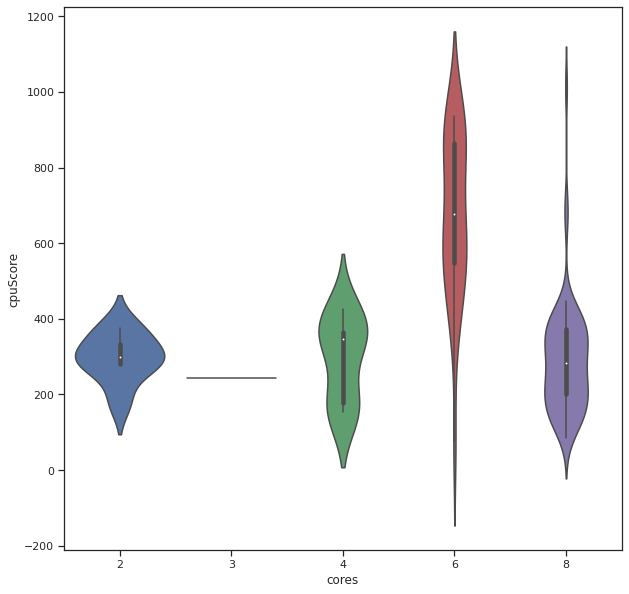

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.violinplot(x='cores', y='cpuScore', data=data)

Из графика видно, что в среднем, больше всего рейтинга производительности имеют смартфоны с 6 ядрами 

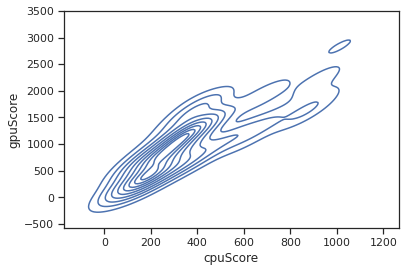

In [ ]:
sns.kdeplot(data=data, x="cpuScore", y="gpuScore")

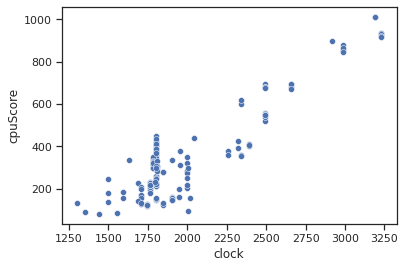

In [ ]:
sns.scatterplot(x='clock', y='cpuScore', data=data)

Text(0.5, 0.98, 'Корреляционные матрицы')

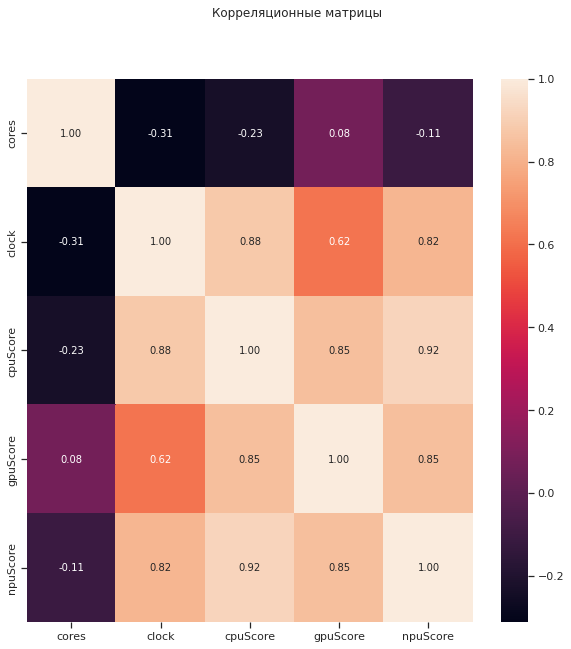

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы')

Построение диаграмм для набора данных

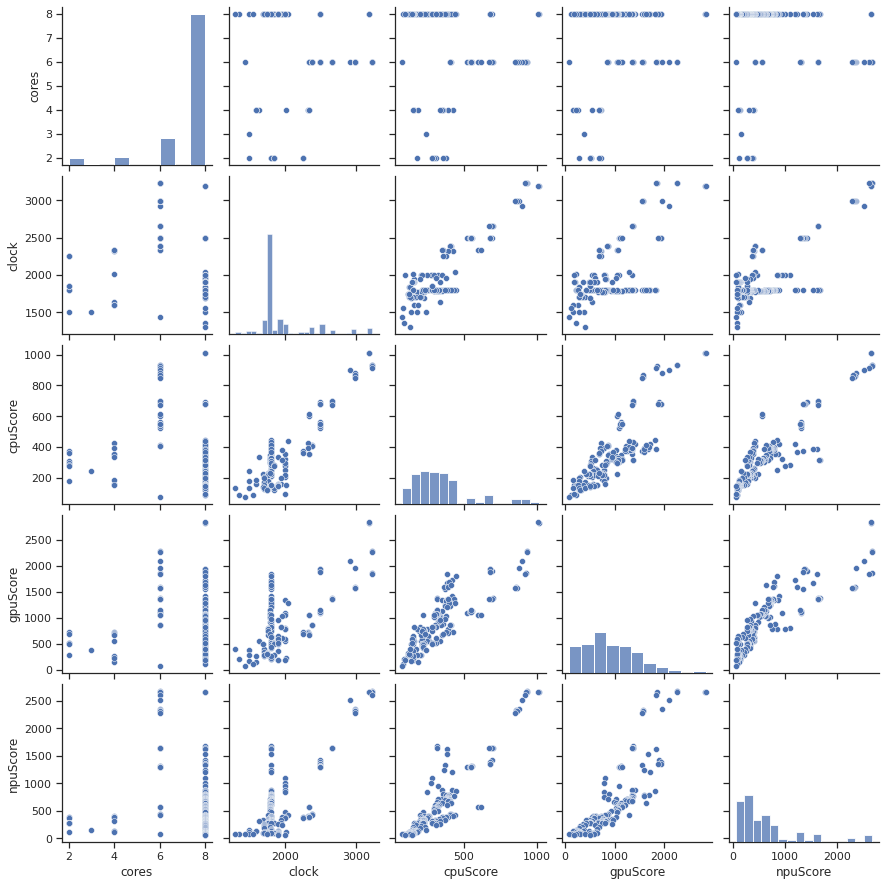

In [ ]:
sns.pairplot(data)
plt.show()